문제 정의하기
- 이중분류예제에 적합한 데이터셋은 12개 변수(주석산농도, 아세트산농도, 구연산농도, 잔류당분농도,염화나트륨농도, 유리아황산농도, 총아황산농도, 밀도, pH, 황산칼슘농도, 알코올도수, 와인의맛(0~10등급)) 13번째는 class 와인 종류 2가지(1:레드와인, 0: 화이트와인) 와인 데이터 셋
- 12개 독립변수로 보고 와인의 종류(레드와인, 화이트와인)를 분류하는 이중분류 문제로 정의

In [ ]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers.core import Dense

Using TensorFlow backend.


데이터 준비하기

In [ ]:
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/machinlaur/0727/wine.csv", header=None)
print(data.head())
data.shape

     0     1     2    3      4     5     6       7     8     9    10  11  12
0   7.4  0.70  0.00  1.9  0.076  11.0  34.0  0.9978  3.51  0.56  9.4   5   1
1   7.8  0.88  0.00  2.6  0.098  25.0  67.0  0.9968  3.20  0.68  9.8   5   1
2   7.8  0.76  0.04  2.3  0.092  15.0  54.0  0.9970  3.26  0.65  9.8   5   1
3  11.2  0.28  0.56  1.9  0.075  17.0  60.0  0.9980  3.16  0.58  9.8   6   1
4   7.4  0.70  0.00  1.9  0.076  11.0  34.0  0.9978  3.51  0.56  9.4   5   1


(6497, 13)

데이터셋 생성하기 - 입력(속성값 12개)와 출력(판정결과 1개) 변수 분리

In [ ]:
from sklearn.model_selection import train_test_split

x = data.iloc[:, 0:12].values
y = data.iloc[:, 12].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3)

print(x_train.shape)
print(x_test.shape)

(4547, 12)
(1950, 12)


In [ ]:
#내가 작성한 데이터셋 생성하기
#x_train = data[:4547,0:12]
#y_train = data[:4547,12]
#x_test = data[4547:,0:12]
#y_test = data[4547:,12]

모델 구성하기

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 30)                390       
_________________________________________________________________
dense_6 (Dense)              (None, 12)                372       
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 9         
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


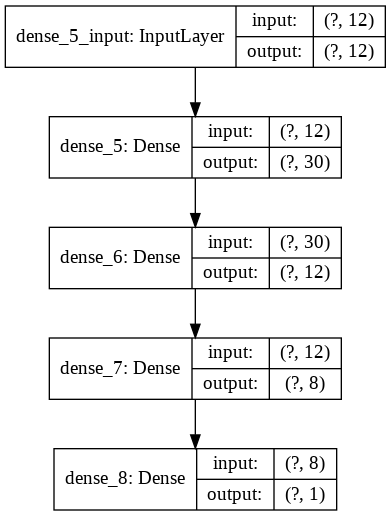

In [ ]:
np.random.seed(7)# 여러번 학습하면 결과가 들숙날숙하니까 랜덤시드를 설정해주면 그 정해진 범위만 실행해주니까 결과가 동일

model = Sequential()

model.add(Dense(30, input_shape=(12,), activation='relu'))#input_shape과 input_dim의 차이를 다시 생각해보기
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True,rankdir='TB', expand_nested=False, dpi=96)

모델 학습과정 설정하기

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

모델 학습하기

In [ ]:
history = model.fit(x_train, y_train,
                    epochs=500, 
                    batch_size=150,
                    validation_data = (x_test, y_test))

Train on 4547 samples, validate on 1950 samples
Epoch 1/500
4547/4547 [==============================] - 0s 40us/step - loss: 0.3879 - accuracy: 0.8344 - val_loss: 0.2929 - val_accuracy: 0.9118
Epoch 2/500
4547/4547 [==============================] - 0s 15us/step - loss: 0.2553 - accuracy: 0.9248 - val_loss: 0.2473 - val_accuracy: 0.9215
Epoch 3/500
4547/4547 [==============================] - 0s 14us/step - loss: 0.2204 - accuracy: 0.9305 - val_loss: 0.2291 - val_accuracy: 0.9236
Epoch 4/500
4547/4547 [==============================] - 0s 12us/step - loss: 0.2056 - accuracy: 0.9309 - val_loss: 0.2221 - val_accuracy: 0.9221
Epoch 5/500
4547/4547 [==============================] - 0s 12us/step - loss: 0.1988 - accuracy: 0.9309 - val_loss: 0.2179 - val_accuracy: 0.9226
Epoch 6/500
4547/4547 [==============================] - 0s 13us/step - loss: 0.1958 - accuracy: 0.9312 - val_loss: 0.2174 - val_accuracy: 0.9241
Epoch 7/500
4547/4547 [==============================] - 0s 13us/step - loss

학습 결과 그려보기

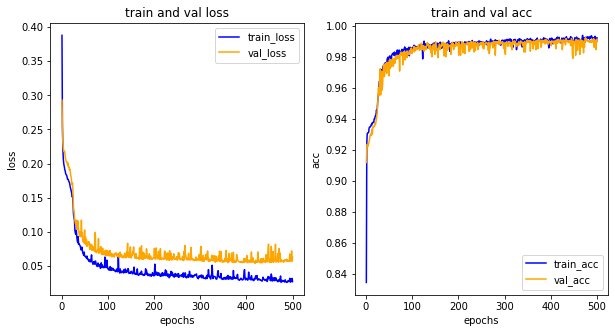

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] # 검증 데이터가 있는 경우 ‘val_’ 수식어가 붙습니다.

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['accuracy']
val_acc = his_dict['val_accuracy']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

모델 평가하기

In [ ]:
scores = model.evaluate(x_test, y_test)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

1950/1950 [==============================] - 0s 22us/step
accuracy: 98.97%
